# Data Exploration

# Importing library and clean dataset

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [37]:
df=pd.read_csv('C:\\Users\\Nour Muayad\\findal.csv')

In [38]:
df

,Unnamed: 0,country,Student ID,Gender,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,...,Science Score,Birth Country Chil,Birth Country Father,Birth Country Mother,Education - Father,Education - Mother,Parents - Same Cultural Background,Average Total Score,Out-of-School Study Time - Total,Learning Time - Total
0,0,Qatar,9384,Female,9.0,3.0,3.0,6.0,2.0,300.0,...,407.34802,Qatar,Qatar,Qatar,Post-secondary,Bachelor’s or equivalent,Same,1232.44152,23.0,780.0
1,1,Qatar,9888,Male,7.0,6.0,5.0,5.0,1.0,250.0,...,374.24470,Qatar,Qatar,Qatar,Post-secondary,Bachelor’s or equivalent,Same,1116.74554,24.0,700.0
2,2,Qatar,8729,Male,9.0,3.0,2.0,1.0,3.0,330.0,...,284.63260,Qatar,Qatar,Qatar,Post-secondary,Bachelor’s or equivalent,Same,770.92724,18.0,990.0
3,3,China-Shanghai,2153,Male,10.0,0.0,0.0,6.0,0.0,320.0,...,567.45616,Another province in mainland China (QCN),Another province in mainland China (QCN),Another province in mainland China (QCN),Post-secondary,Bachelor’s or equivalent,Same,1616.61110,16.0,960.0
4,4,China-Shanghai,3141,Female,20.0,0.0,0.0,0.0,0.0,160.0,...,665.74038,China (Shanghai),China (Shanghai),China (Shanghai),Post-secondary,Bachelor’s or equivalent,Same,2035.63988,20.0,760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28676,28676,Brazil,15337,Male,2.0,0.0,0.0,0.0,0.0,118.0,...,487.72844,Brazil,Brazil,Brazil,Primary,Early childhood,Same,1496.03880,2.0,413.0
28677,28677,Brazil,12822,Male,30.0,30.0,30.0,30.0,30.0,360.0,...,312.23424,Brazil,Brazil,Brazil,Primary,Early childhood,Same,883.55900,150.0,720.0
28678,28678,Brazil,13635,Male,2.0,1.0,0.0,0.0,1.0,300.0,...,384.68852,Brazil,Brazil,Brazil,Primary,Early childhood,Same,1245.93108,4.0,850.0
28679,28679,Brazil,18913,Male,2.0,1.0,0.0,0.0,1.0,200.0,...,498.26558,Brazil,Brazil,Brazil,Primary,Early childhood,Same,1509.87930,4.0,500.0


In [39]:
df['Student ID'].duplicated().sum()

0

In [40]:
color1 = '#a7d7c5'
color2 = '#74b49b'
color3 = '#5c8d89'
color_male = '#ff8162' 
color_female = '#ffcd60'
color_gends = ['#ffcd60', '#ff8162']
line = '#ff8000'

# Assessing and Cleaning the Data

In [41]:
df.shape

(28681, 24)

In [42]:
df.dtypes

Unnamed: 0                                         int64
country                                           object
Student ID                                         int64
Gender                                            object
Out-of-School Study Time - Homework              float64
Out-of-School Study Time - Guided Homework       float64
Out-of-School Study Time - Personal Tutor        float64
Out-of-School Study Time - Commercial Company    float64
Out-of-School Study Time - With Parent           float64
Learning Time - Mathematics                      float64
Learning Time - Test Language                    float64
Learning Time - Science                          float64
Math Score                                       float64
Reading Score                                    float64
Science Score                                    float64
Birth Country Chil                                object
Birth Country Father                              object
Birth Country Mother           

# Univariate Exploration

# Average Scores for Students

<Figure size 640x480 with 0 Axes>

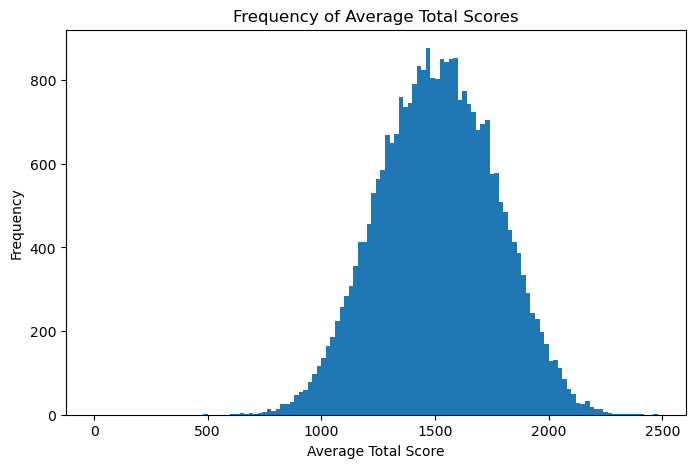

In [45]:
binsize=20
plt.subplots_adjust(wspace=0.5)
bins=np.arange(0,df['Average Total Score'].max()+binsize,binsize)
plt.figure(figsize=[8,5])
plt.hist(data=df, x='Average Total Score',bins=bins)
plt.xlabel('Average Total Score')
plt.ylabel('Frequency')
plt.title('Frequency of Average Total Scores');

normal distribution.

# Visualizing Average Scores for Math, Science, and Reading

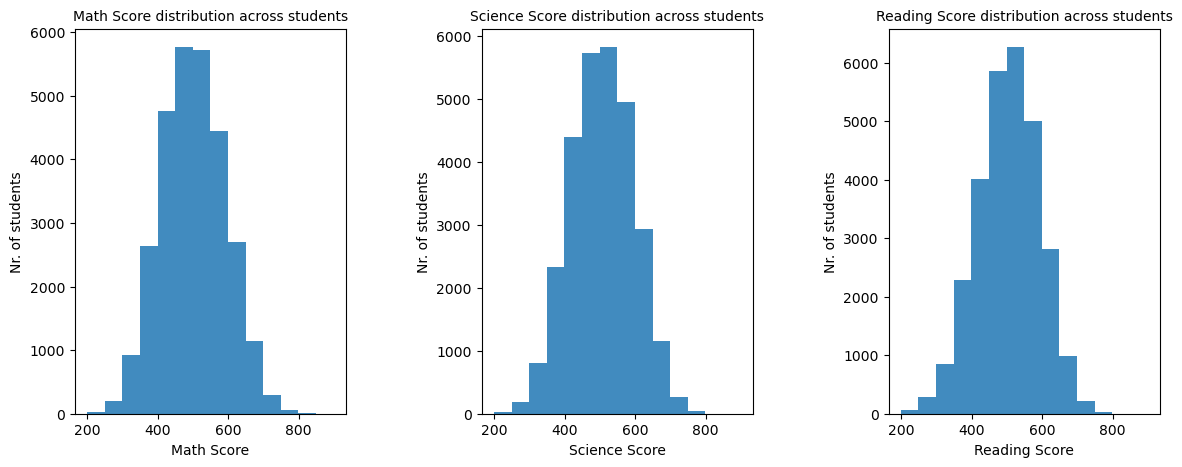

In [44]:
plt.figure(figsize = [14, 5])
plt.subplots_adjust(wspace=0.5)

bins_hist = np.arange(df['Math Score'].min(), df['Math Score'].max()+10, 50)

plt.subplot(1, 3, 1)
plt.hist(df['Math Score'], bins = bins_hist, alpha = 0.85);

#plt.xlim(0, 1000);
#plt.xticks(bins_hist)
plt.xlabel('Math Score');
plt.ylabel('Nr. of students')
plt.title("Math Score distribution across students",fontsize=10);

plt.subplot(1,3,2)
plt.hist(df['Science Score'], bins=bins_hist,alpha=0.85);
#plt.xlim(0, 1000);
#plt.xticks(bins_hist)
plt.xlabel('Science Score');
plt.ylabel('Nr. of students')
plt.title("Science Score distribution across students",fontsize=10);

plt.subplot(1,3,3)
plt.hist(df['Reading Score'],bins=bins_hist,alpha=0.85);
#plt.xlim(0, 1000);

plt.xlabel('Reading Score');
plt.ylabel('Nr. of students')
plt.title("Reading Score distribution across students", fontsize=10);


From the above distributions, we find out that:
the vast majority of the students are scoring in each subject between 300 and 700 points, while a small portion of the total number achieves poorer (between 200 and 300 points) or greater (between 700 and 800 points) test performance

# Top 10 Countries with Higher Student Scores

In [18]:
df.columns

Index(['Unnamed: 0', 'country', 'Student ID', 'Gender',
       'Out-of-School Study Time - Homework',
       'Out-of-School Study Time - Guided Homework',
       'Out-of-School Study Time - Personal Tutor',
       'Out-of-School Study Time - Commercial Company',
       'Out-of-School Study Time - With Parent', 'Learning Time - Mathematics',
       'Learning Time - Test Language', 'Learning Time - Science',
       'Math Score', 'Reading Score', 'Science Score', 'Birth Country Chil',
       'Birth Country Father', 'Birth Country Mother', 'Education - Father',
       'Education - Mother', 'Parents - Same Cultural Background',
       'Average Total Score', 'Out-of-School Study Time - Total',
       'Learning Time - Total'],
      dtype='object')

In [19]:
q4=df['Math Score'].quantile(0.75)
q4r=df['Reading Score'].quantile(0.75)
q4s=df['Science Score'].quantile(0.75)


In [46]:
high_Math=df[df['Math Score']> q4]['country'].value_counts()
high_Reading=df[df['Reading Score']> q4r]['country'].value_counts()
high_Science=df[df['Science Score']> q4s]['country'].value_counts()
top10=high_Math.head(10)


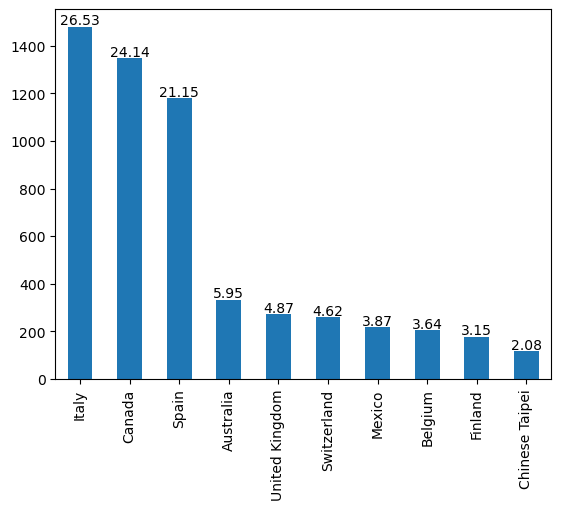

In [31]:
#plt.figure(figsize = [10,6])
topsum=top10.sum()

top10.plot(kind='bar')

for i,j in enumerate(top10):
    res=round((j/topsum)*100, 2)
    plt.text(i,j+10,res, ha='center')
    

    

In [23]:
top10

Italy             1481
Canada            1348
Spain             1181
Australia          332
United Kingdom     272
Switzerland        258
Mexico             216
Belgium            203
Finland            176
Chinese Taipei     116
Name: country, dtype: int64

# Impact of Parent's Nationality on Student Performance: Same Country vs. Different Country

In [13]:
df['Average Total Score'].max()

2462.568

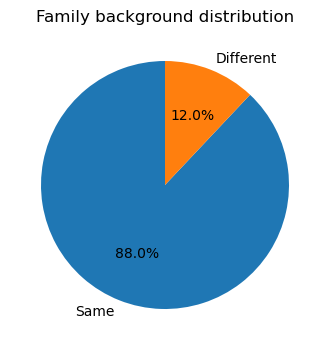

In [14]:
same_diff=df['Parents - Same Cultural Background'].value_counts()
labels=same_diff.index
counts=same_diff.values
plt.figure(figsize=[4,8])
plt.pie(counts, labels=labels,startangle=90,autopct='%1.1f%%')
plt.title('Family background distribution')

plt.show()

From this previous distribution, we discover that there are almost 4 times more students having parents with same cultural background than those having parents with different backgrounds.

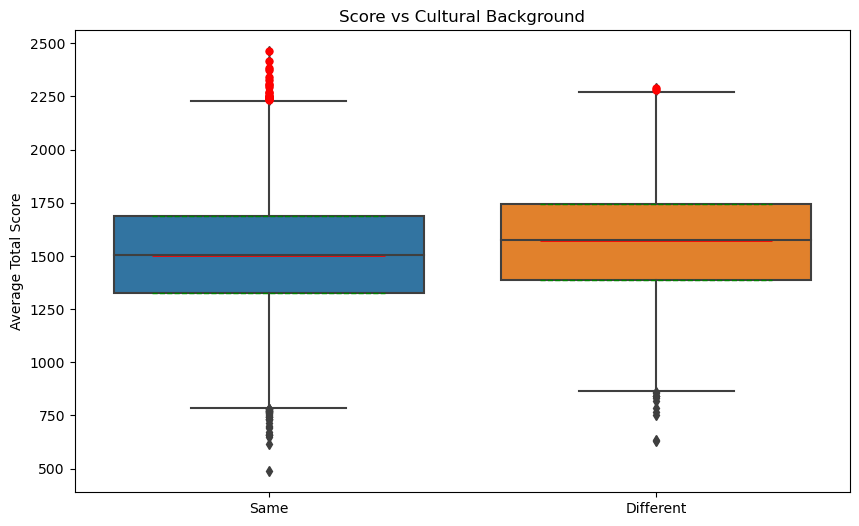

In [15]:
same_scores = df[df['Parents - Same Cultural Background'] == 'Same']['Average Total Score']
different_scores = df[df['Parents - Same Cultural Background'] == 'Different']['Average Total Score']

plt.figure(figsize=(10, 6))
sns.boxplot(data=[same_scores, different_scores])
plt.xticks(ticks=[0, 1], labels=['Same', 'Different'])
plt.ylabel('Average Total Score')
plt.title('Score vs Cultural Background')

# Add horizontal lines for median and quartiles
medians = [same_scores.median(), different_scores.median()]
q1 = [same_scores.quantile(0.25), different_scores.quantile(0.25)]
q3 = [same_scores.quantile(0.75), different_scores.quantile(0.75)]

for i in range(2):
    plt.hlines(y=medians[i], xmin=i-0.3, xmax=i+0.3, color='r', linestyle='-', linewidth=2)
    plt.hlines(y=q1[i], xmin=i-0.3, xmax=i+0.3, color='g', linestyle='--', linewidth=1)
    plt.hlines(y=q3[i], xmin=i-0.3, xmax=i+0.3, color='g', linestyle='--', linewidth=1)

# Add markers for outliers
outliers_same = same_scores[same_scores > q3[0] + 1.5 * (q3[0] - q1[0])]
outliers_different = different_scores[different_scores > q3[1] + 1.5 * (q3[1] - q1[1])]
plt.plot([0] * len(outliers_same), outliers_same, 'ro', markersize=5)
plt.plot([1] * len(outliers_different), outliers_different, 'ro', markersize=5)

plt.show()


According to the preceding distribution, it is observed that the median average score of students from different cultures surpasses the average score of students from the same culture (albeit marginally).

# Father's VS Mother's Education 

In [16]:
df.columns

Index(['Unnamed: 0', 'country', 'Student ID', 'Gender',
       'Out-of-School Study Time - Homework',
       'Out-of-School Study Time - Guided Homework',
       'Out-of-School Study Time - Personal Tutor',
       'Out-of-School Study Time - Commercial Company',
       'Out-of-School Study Time - With Parent', 'Learning Time - Mathematics',
       'Learning Time - Test Language', 'Learning Time - Science',
       'Math Score', 'Reading Score', 'Science Score', 'Birth Country Chil',
       'Birth Country Father', 'Birth Country Mother', 'Education - Father',
       'Education - Mother', 'Parents - Same Cultural Background',
       'Average Total Score', 'Out-of-School Study Time - Total',
       'Learning Time - Total'],
      dtype='object')

Text(0.5, 1.0, 'Father Education')

<Figure size 640x480 with 0 Axes>

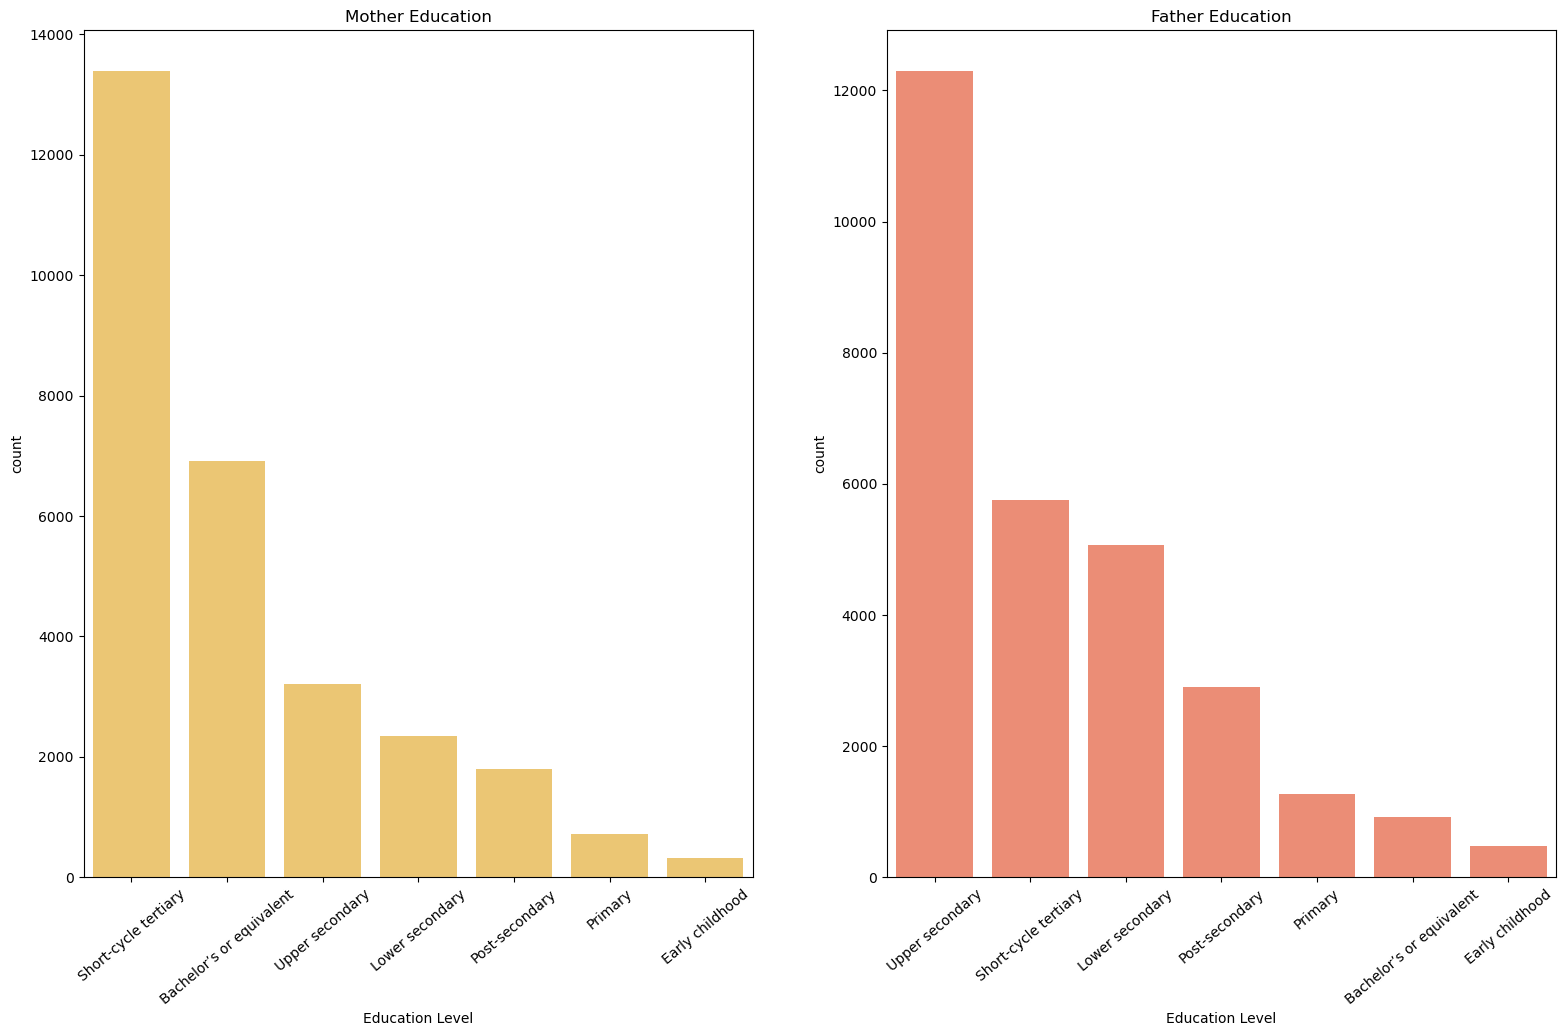

In [17]:

plt.subplots_adjust(wspace=0.5)
plt.figure(figsize=[19,11])
plt.subplot(1,2,1)
sb.countplot(data=df, x='Education - Mother',color='#ffcd60',order=df['Education - Mother'].value_counts().index)
plt.xticks(rotation=40)
plt.xlabel('Education Level')
plt.title('Mother Education')

plt.subplot(1,2,2)
sb.countplot(data=df, x='Education - Father',color='#ff8162',order=df['Education - Father'].value_counts().index)
plt.xticks(rotation=40)
plt.xlabel('Education Level')
plt.title('Father Education')


 it shows that the students that exist in this dataset typically have parents of higher educational levels. Short-cycle Tertiary education takes a clear majority for both mother and father, while parents with just Early Childhood education have the lowest amount of children in this dataset.

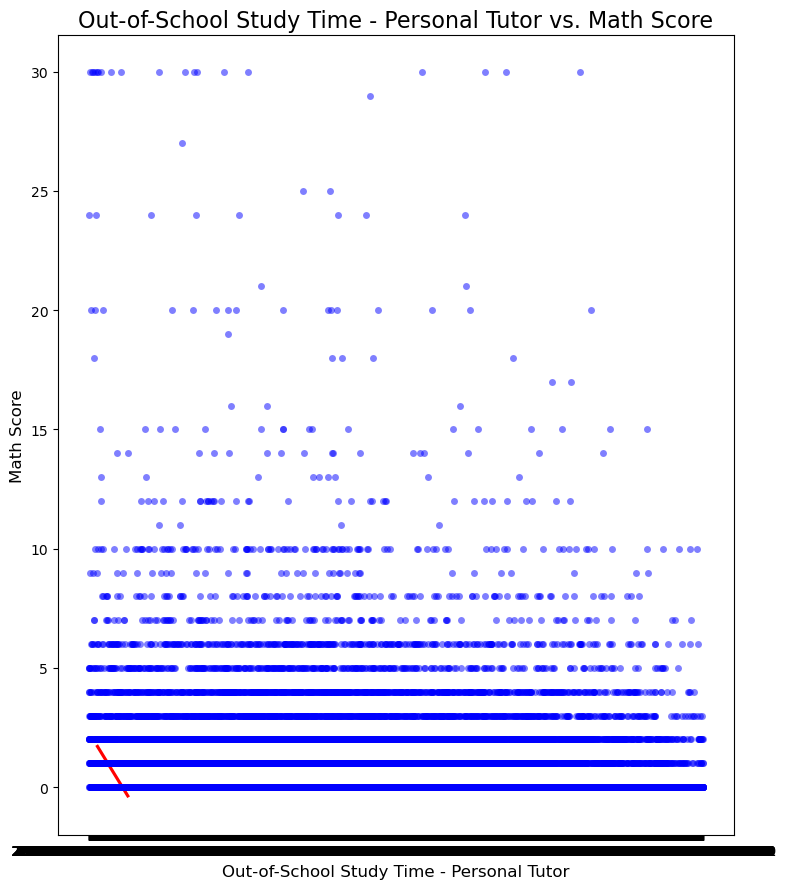

In [48]:
plt.figure(figsize=[8,9])
sb.stripplot(data=df, x='Math Score', y='Out-of-School Study Time - Personal Tutor', color='blue', alpha=0.5, jitter=True)

sb.regplot(data=df, x='Math Score', y='Out-of-School Study Time - Personal Tutor', scatter=False, color='red')
plt.title('Out-of-School Study Time - Personal Tutor vs. Math Score', fontsize=16)
plt.xlabel('Out-of-School Study Time - Personal Tutor', fontsize=12)
plt.ylabel('Math Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

Here we can see how many female and male children have parents that fall into the educational levels. It's generally about the same

# Multivariate Exploration and Analysis

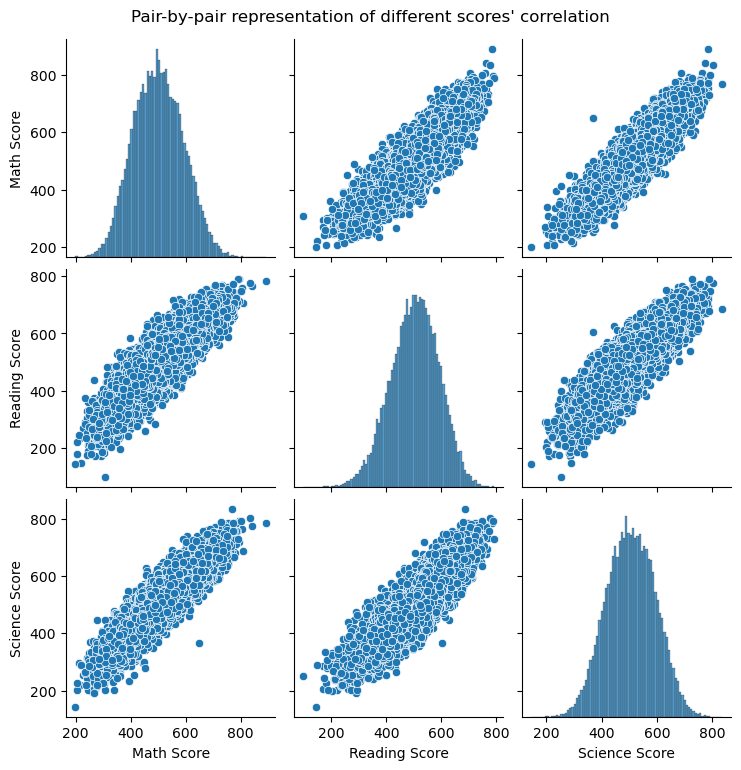

In [50]:
grade_rel=sb.pairplot(data=df, vars=["Math Score", "Reading Score", "Science Score"]);
grade_rel.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1.02);

# Exploring the Relationship Between Out-of-School Study Time and Student Scores

# Out-of-School Study Time and Learning Time

let's look at the correlations between each of the Scores, the Total Out-of-School Study Time, and the Total Learning Time to see if the amount of time dedicated to a subject has an influence on the score, and how strongly the Scores are correlated with one another. This will help us answer the question of whether or not there is a relationship between the amount of time a student dedicates to learning and their score.

In [32]:
numeric_vars = ['Out-of-School Study Time - Total','Math Score', 'Reading Score', 'Science Score']

<Axes: >

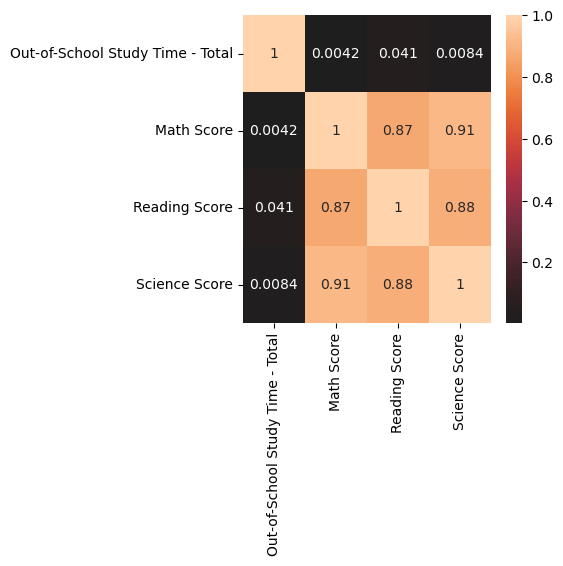

In [33]:
plt.figure(figsize=[4,4])
sb.heatmap(df[numeric_vars].corr(),center=0,annot=True)

In [34]:
df.columns

Index(['Unnamed: 0', 'country', 'Student ID', 'Gender',
       'Out-of-School Study Time - Homework',
       'Out-of-School Study Time - Guided Homework',
       'Out-of-School Study Time - Personal Tutor',
       'Out-of-School Study Time - Commercial Company',
       'Out-of-School Study Time - With Parent', 'Learning Time - Mathematics',
       'Learning Time - Test Language', 'Learning Time - Science',
       'Math Score', 'Reading Score', 'Science Score', 'Birth Country Chil',
       'Birth Country Father', 'Birth Country Mother', 'Education - Father',
       'Education - Mother', 'Parents - Same Cultural Background',
       'Average Total Score', 'Out-of-School Study Time - Total',
       'Learning Time - Total'],
      dtype='object')

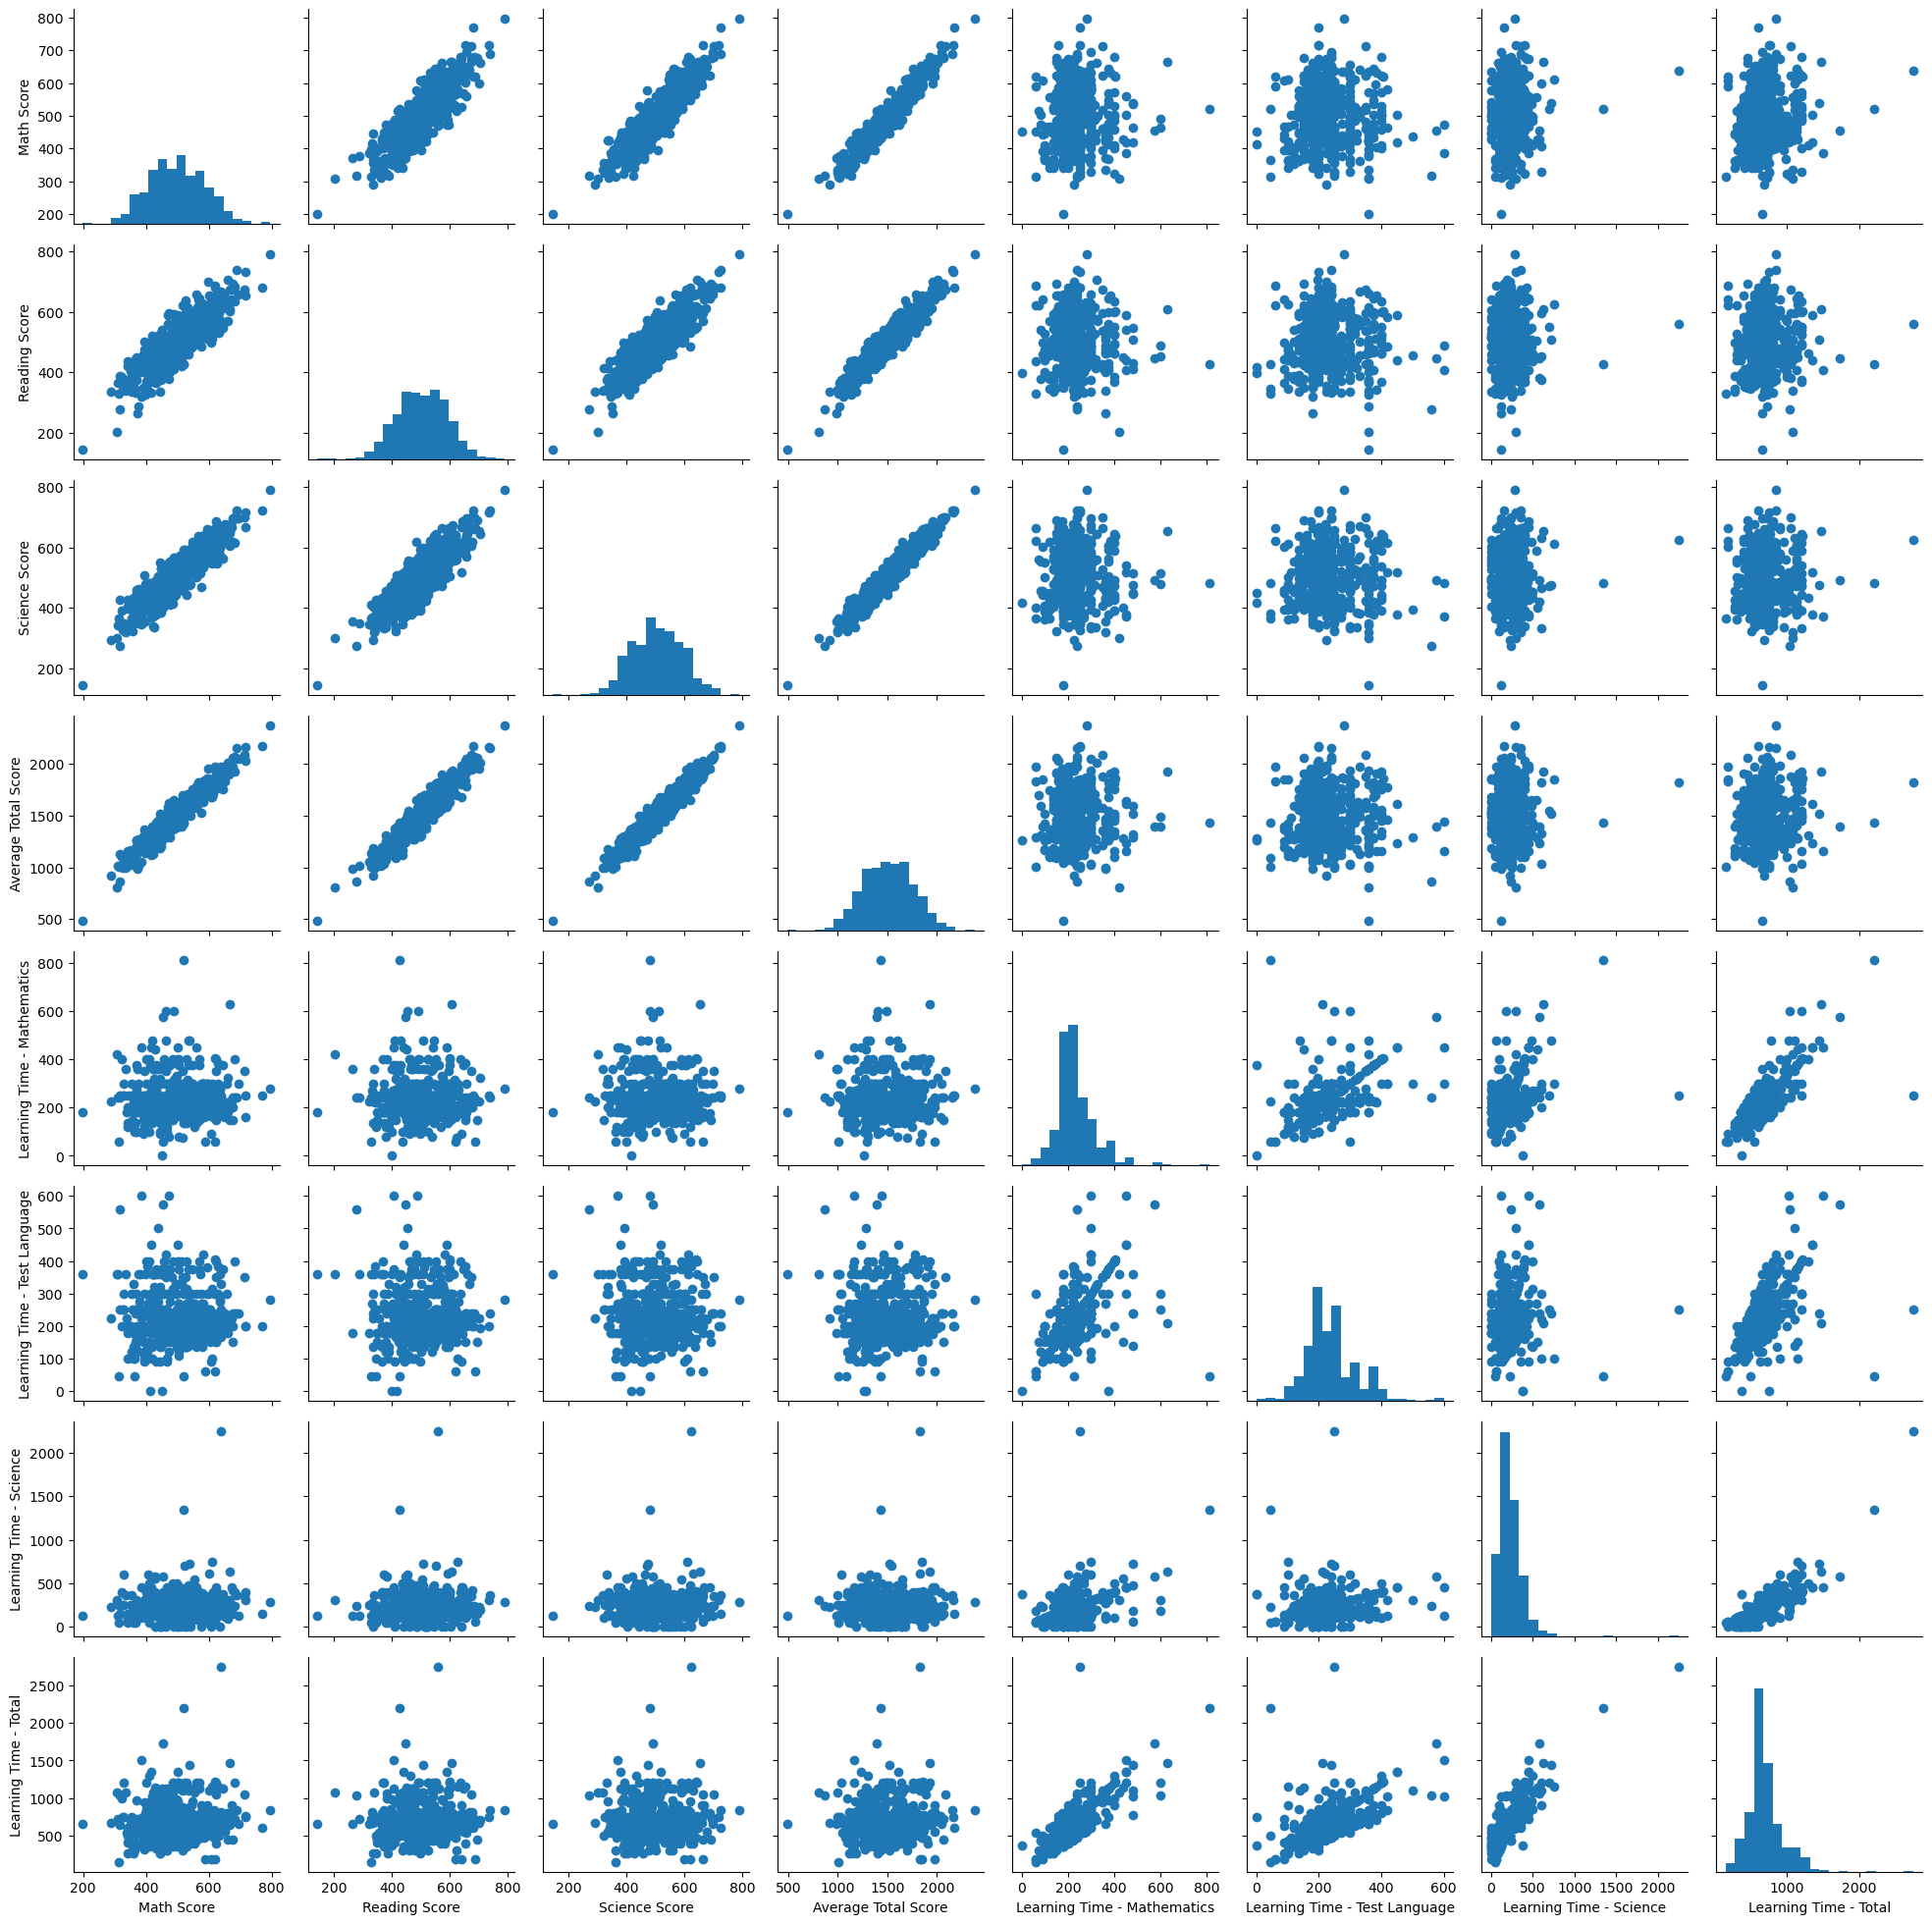

In [51]:


score_learn_vars = ['Math Score', 'Reading Score', 'Science Score',
                    'Average Total Score', 'Learning Time - Mathematics',
                    'Learning Time - Test Language', 'Learning Time - Science',
                    'Learning Time - Total']

sample = np.random.choice(df.shape[0], 500, replace=False)
df_sample = df.loc[sample, :]

grph = sb.PairGrid(data=df_sample, vars=score_learn_vars)
grph = grph.map_diag(plt.hist, bins=20)
grph = grph.map_offdiag(plt.scatter)

plt.show()


# Conclusions and Answers

observation can potentially indicate a positive correlation between the variables 'Out-of-School Study Time - Homework', 'Out-of-School Study Time - Personal Tutor', and 'Average Total Score'. It suggests that students who spend more time on homework and personal tutoring tend to have higher average total scores.

# End